# Machine Learning - Practical 1 - Linear Regression

Names: {Vinzenz Brehme, Miriam Reichlmaier, Dennis Exter}  
Summer Term 2024   

This notebook provides you with the assignments and the overall code structure you need to complete the assignment. There are also questions that you need to answer in text form. Please use full sentences and reasonably correct spelling/grammar.

Regarding submission & grading:

- Work in groups of three and hand in your solution as a group.

- Solutions need to be uploaded to StudIP until the submission date indicated in the course plan. Please upload a copy of this notebook and a PDF version of it after you ran it.

- Solutions need to be presented to tutors in tutorial. Presentation dates are listed in the course plan. Every group member needs to be able to explain everything.

- You have to solve N-1 practicals to get admission to the exam.

- For plots you create yourself, all axes must be labeled. 

- Do not change the function interfaces.

## Imports

Jupyter Notebook provides the possibility of using libraries, functions and variables globally. This means, once you import the libraries, functions, etc. you won't have to import them again in the next cell. However, if for any reason you end the session (crash, timeout, etc.), then you'll have to run this cell to have your libraries imported again. So, let's go ahead and import whatever we need in this homework assignment.

In [4]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## The  dataset

The dataset consists of over 20.000 materials and lists their physical features. From these features, we want to learn how to predict the critical temperature, i.e. the temperature we need to cool the material to so it becomes superconductive. First load and familiarize yourself with the data set a bit.

In [5]:
data = pd.read_csv('superconduct_train.csv')
print(data.shape)

(21263, 82)


In [6]:
data.head()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607              36.161939   
2                 0.975980          122.90607              35.741099   
3                 1.022291          122.90607              33.768010   
4                 1.129224          122.90607              27.848743   

   std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence  wtd_gmean_Valence  \
0        51.968828  ...          2.257143       2.213364           2.219783   
1        47.094633  ...          2.257143       1.888175           2.210679   
2        51.968828  ...          2.271429       2.213364           2.232679   
3        51.968828  ...          2.264286       2.213364           2.226222   
4        51.968828  ...          2.242857       2.213364           2.206963   

   entropy_Valence  wtd_entropy_Valence  range_Valence  wtd_range_Valence  \
0         1.368922             1.066221              1           1.085714   
1         1.557113             1.047221              2           1.128571   
2         1.368922             1.029175              1           1.114286   
3         1.368922             1.048834              1           1.100000   
4         1.368922             1.096052              1           1.057143   

   std_Valence  wtd_std_Valence  critical_temp  
0     0.433013         0.437059           29.0  
1     0.632456         0.468606           26.0  
2     0.433013         0.444697           19.0  
3     0.433013         0.440952           22.0  
4     0.433013         0.428809           23.0  

[5 rows x 82 columns]

Because the dataset is rather large, we prepare a small subset of the data as training set, and another subset as test set. To make the computations reproducible, we set the random seed. This makes the train and test splits same even if you re-run the notebook. Keeping the splits same is important for the fair models comparison.

In [7]:
target_clm = 'critical_temp'  # the critical temperature is our target variable
n_trainset = 200  # size of the training set
n_testset = 500  # size of the test set

In [8]:
# set random seed to make sure every test set is the same
np.random.seed(seed=1)

idx = np.arange(data.shape[0])
idx_shuffled = np.random.permutation(idx)  # shuffle indices to split into training and test set

test_idx = idx_shuffled[:n_testset]
train_idx = idx_shuffled[n_testset:n_testset+n_trainset]
train_full_idx = idx_shuffled[n_testset:]

X_test = data.loc[test_idx, data.columns != target_clm].values
y_test = data.loc[test_idx, data.columns == target_clm].values
print('Test set shapes (X and y)', X_test.shape, y_test.shape)

X_train = data.loc[train_idx, data.columns != target_clm].values
y_train = data.loc[train_idx, data.columns == target_clm].values
print('Small training set shapes (X and y):', X_train.shape, y_train.shape)

X_train_full = data.loc[train_full_idx, data.columns != target_clm].values
y_train_full = data.loc[train_full_idx, data.columns == target_clm].values
print('Full training set shapes (X and y):', X_train_full.shape, y_train_full.shape)

Test set shapes (X and y) (500, 81) (500, 1)
Small training set shapes (X and y): (200, 81) (200, 1)
Full training set shapes (X and y): (20763, 81) (20763, 1)


## Task 1: Plot the dataset

To explore the dataset, use `X_train_full` and `y_train_full` for two descriptive plots:

* **Histogram** of the target variable. Use `plt.hist`.

* **Scatter plots** relating the target variable to one of the feature values. For this you will need 81 scatter plots. Arrange them in one big figure with 9x9 subplots. Use `plt.scatter`. You may need to adjust the marker size and the alpha blending value. 

Furthermore, we need to normalize the data, such that each feature has a mean of zero mean and a variance of one. Implement a function `normalize` which normalizes the data. Print the means and standard variation of the first five features before and after.

(1681803,)
(20763,)


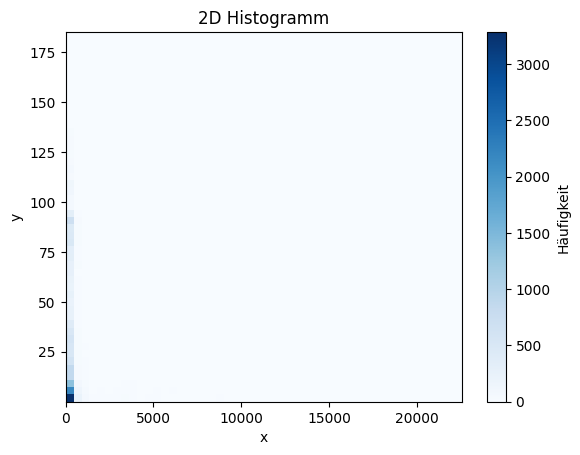

In [9]:
# Histogram of the target variable

print(X_train_full.flatten().shape)
print(y_train_full.flatten().shape)

ind = np.random.choice(len(X_train_full), len(y_train_full), replace=False)
x_dwnsmpld = X_train_full.flatten()[ind]
y_dwnsmpld = y_train_full.flatten()

plt.hist2d(x_dwnsmpld, y_dwnsmpld, bins=50, cmap='Blues')
plt.colorbar(label="Häufigkeit")
plt.title('2D Histogramm')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

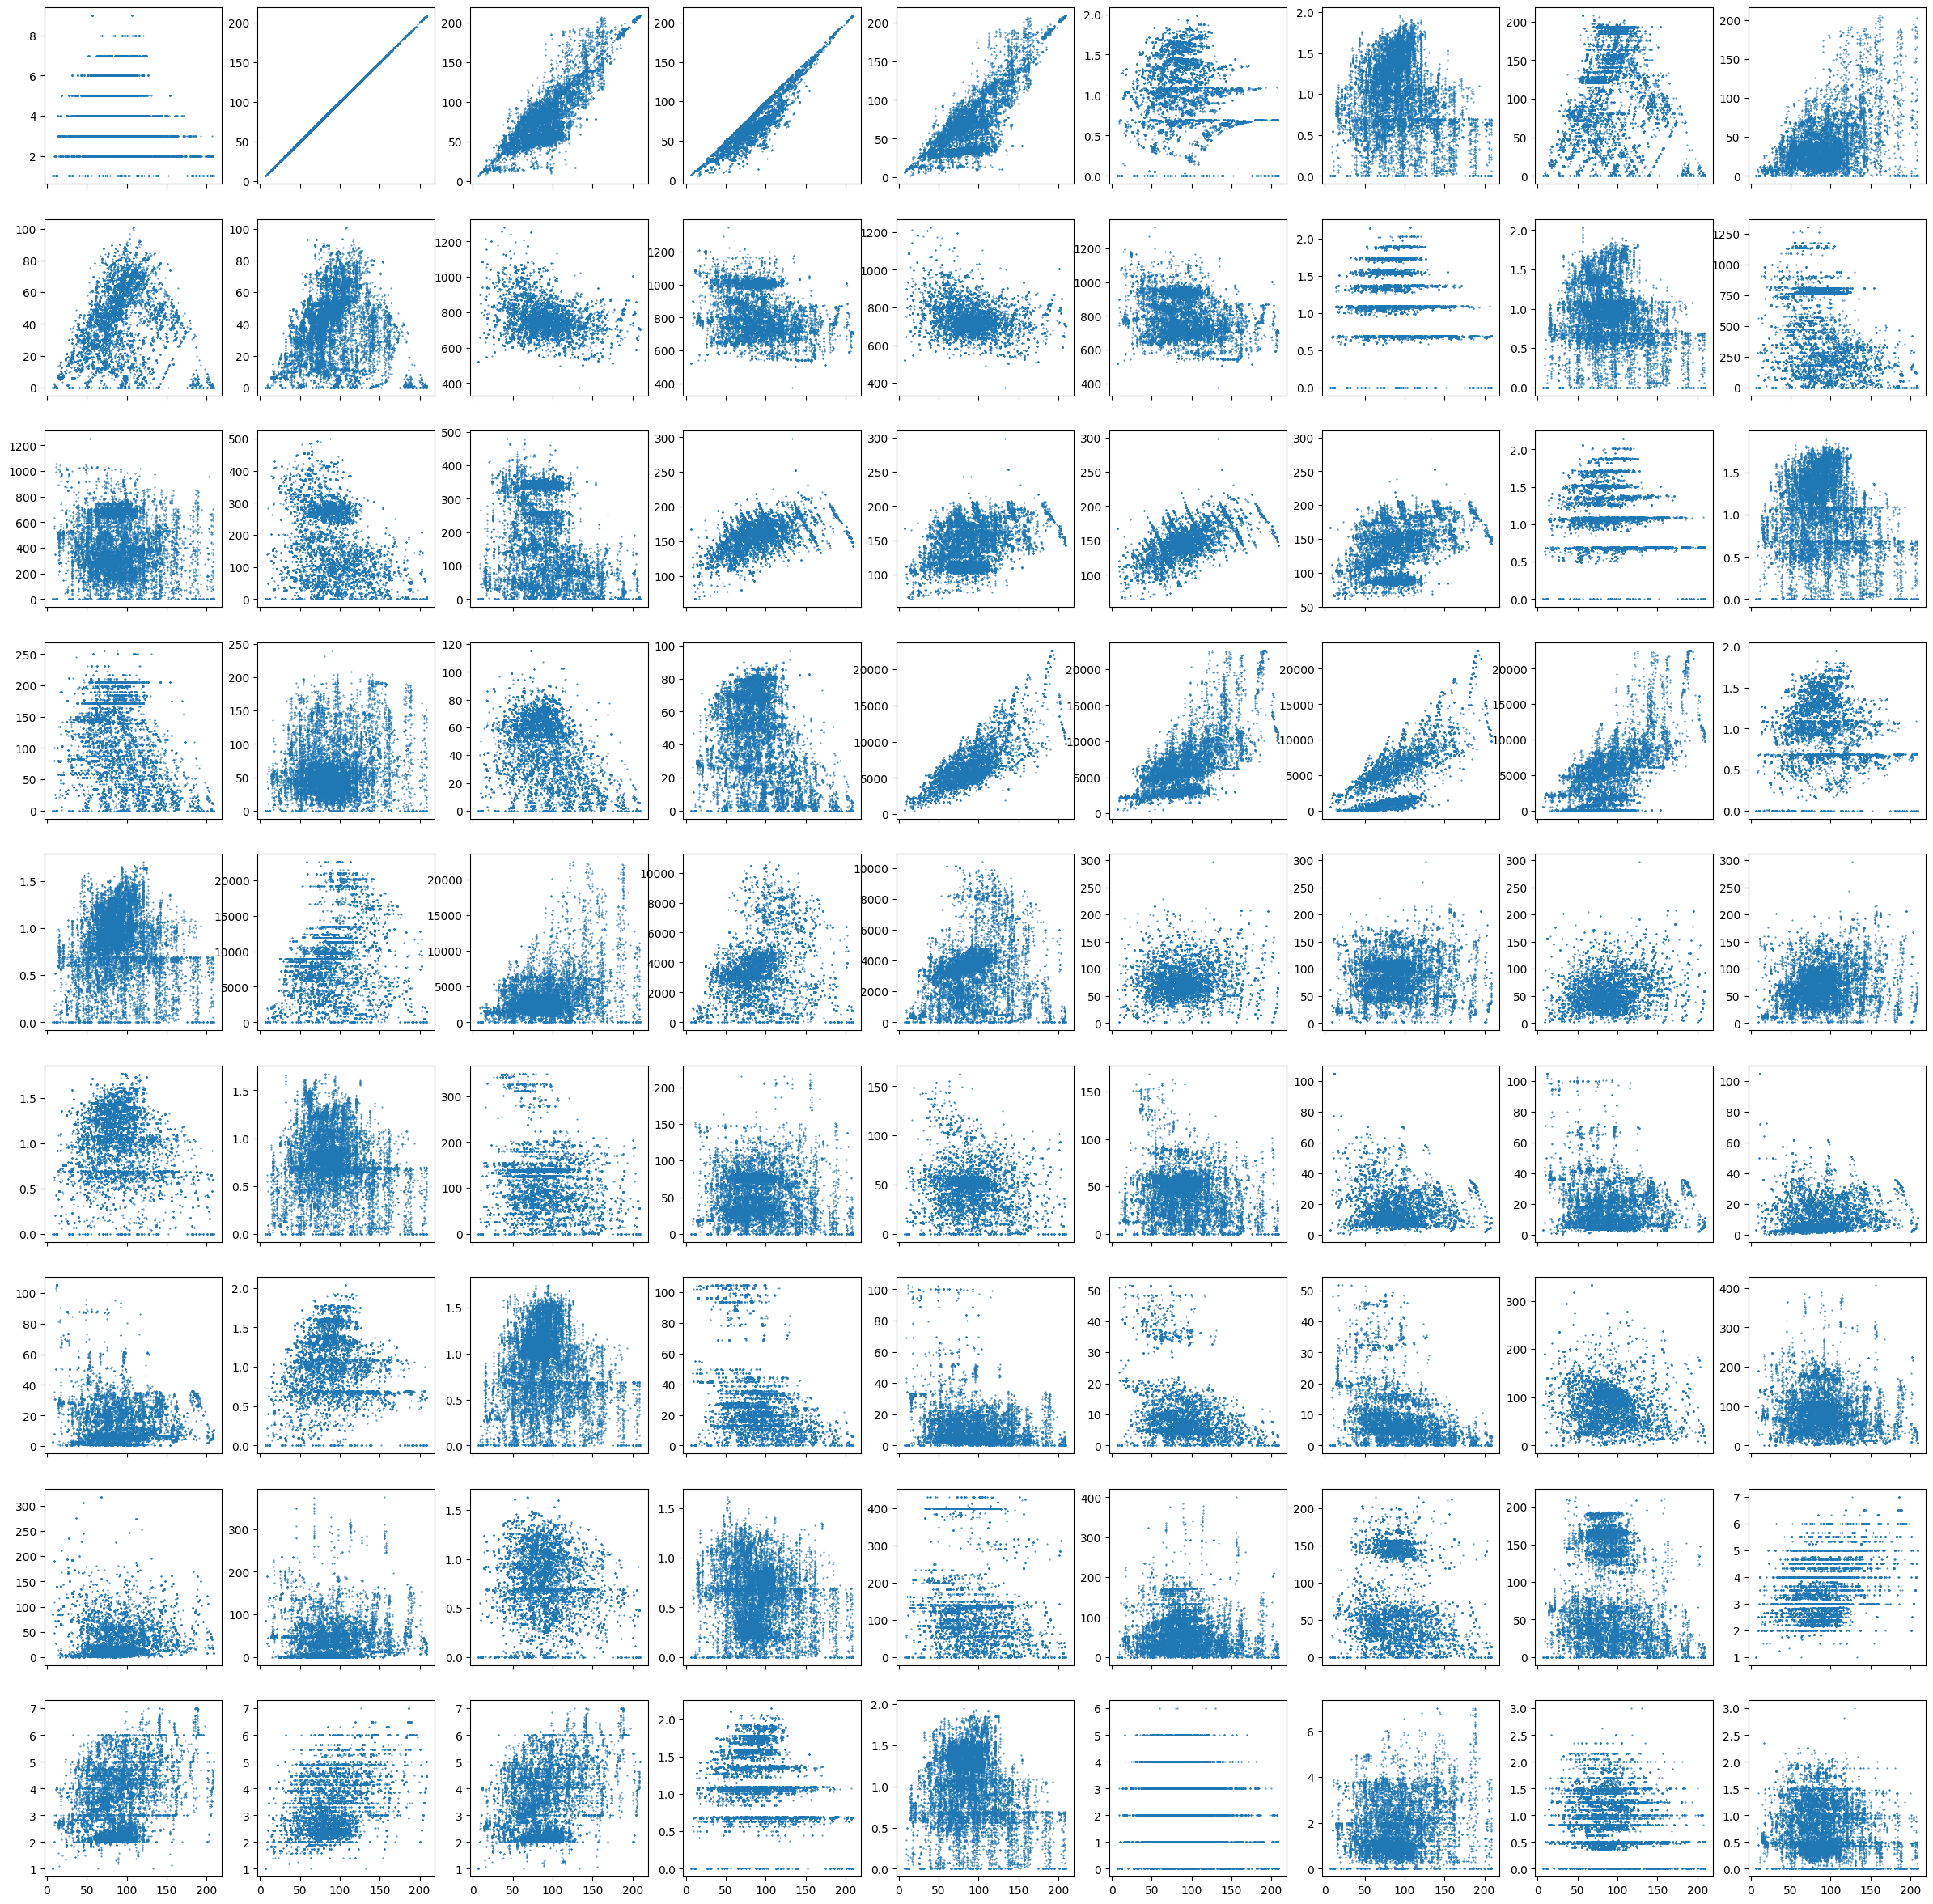

In [10]:
# Scatter plots of the target variable vs. features

fig, axs = plt.subplots(9 , 9, figsize=(30, 30), sharex=all)
feature_column=0
rows=0
cols=0
while rows <= 8:
    while cols <= 8:
        axs[rows, cols].scatter(X_train_full[:,1], X_train_full[:,feature_column], s=0.2)
        cols=cols+1
        feature_column=feature_column+1
    rows=rows+1
    cols = 0
plt.show()




In [11]:
# combining data
combined_data = np.column_stack((X_train_subplot, y_train_subplot))
# Min-Max-Normalize -> 
# x - minx / maxx - minx

for i in range(5):
    print(f"Mean of {i} = {np.mean(combined_data[i])} before norm")
    print(f"Variance of {i} = {np.var(combined_data[i])} before norm")

def normalize(data):
    min = np.amin(data, axis=0)
    max = np.amax(data, axis=0)
    normalized_data = (data - min) / (max - min)
    return normalized_data


normalized_combined_data = normalize(combined_data[:5])
# Werte ausprinten um zu verstehen, wie die range von zahlen ist.
for i in range(5):
    print(f"Mean of {i} = {np.mean(combined_data[:,i])} before norm")
    print(f"Variance of {i} = {np.var(combined_data[:,i])} before norm")
    print(f"Mean of {i} = {np.mean(normalized_combined_data[:,i])} after norm")
    print(f"Variance of {i} = {np.var(normalized_combined_data[:,i])} after norm")
    print()



NameError: name 'X_train_subplot' is not defined

Which material properties may be useful for predicting superconductivity? What other observations can you make?

 YOUR ANSWER HERE

## Task 2:  Implement your own OLS estimator

We want to use linear regression to predict the critical temperature. Implement the ordinary least squares estimator without regularization 'by hand':

$w = (X^TX)^{-1}X^Ty$

To make life a bit easier, we provide a function that can be used to plot regression results. In addition it computes the mean squared error and the squared correlation between the true and predicted values. 

In [12]:
def plot_regression_results(y_test, y_pred, weights):
    '''Produces three plots to analyze the results of linear regression:
        -True vs predicted
        -Raw residual histogram
        -Weight histogram

    Inputs:
        y_test: (n_observations,) numpy array with true values
        y_pred: (n_observations,) numpy array with predicted values
        weights: (n_weights) numpy array with regression weights'''

    print('MSE: ', mean_squared_error(y_test, y_pred))
    print('r^2: ', r2_score(y_test, y_pred))

    fig, ax = plt.subplots(1, 3, figsize=(9, 3))
    # predicted vs true
    ax[0].scatter(y_test, y_pred, s=2)
    ax[0].set_title('True vs. Predicted')
    ax[0].set_xlabel('True %s' % (target_clm))
    ax[0].set_ylabel('Predicted %s' % (target_clm))

    # residuals
    error = np.squeeze(np.array(y_test)) - np.squeeze(np.array(y_pred))
    ax[1].hist(np.array(error), bins=30)
    ax[1].set_title('Raw residuals')
    ax[1].set_xlabel('(true-predicted)')

    # weight histogram
    ax[2].hist(weights, bins=30)
    ax[2].set_title('weight histogram')

    plt.tight_layout()

As an example, we here show you how to use this function with random data. 

MSE:  21335.888511230496
r^2:  -16.034100563641697


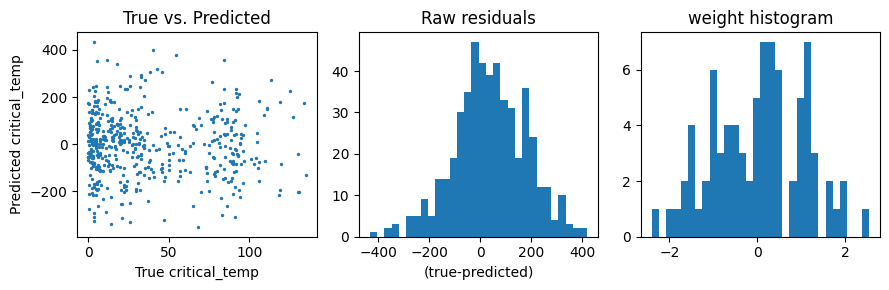

In [13]:
# weights is a vector of length 82: the first value is the intercept (beta0), then 81 coefficients
weights = np.random.randn(82)

# Model predictions on the test set
y_pred_testing = np.random.randn(y_test.size) * np.max(y_test)

plot_regression_results(y_test, y_pred_testing, weights)

Implement OLS linear regression yourself. Use `X_train` and `y_train` for estimating the weights and compute the MSE and $r^2$ from `X_test`. When you call our plotting function with the regression result, you should get mean squared error of 707.8.

In [14]:
def ols_regression(X_test, X_train, y_train):
    '''Computes OLS weights for linear regression without regularization on the training set and
       returns weights and testset predictions.

       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set

       Outputs:
         weights: The weight vector for the regerssion model including the offset
         y_pred: The predictions on the TEST set

       Note:
         Both the training and the test set need to be appended manually by a columns of 1s to add
         an offset term to the linear regression model.
    '''

    # ---------------- INSERT CODE ----------------------


    X_train_offset = np.concatenate((X_train, np.ones((X_train.shape[0], 1))), axis=1)
    X_test_offset  = np.concatenate((X_test,  np.ones((X_test.shape[0],  1))), axis=1)

    # Use ridge regression formula
    weights = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X_train_offset), X_train_offset)), np.transpose(X_train_offset)), y_train)

    y_pred = np.matmul(X_test_offset, weights)
    
    # ---------------- END CODE -------------------------

    return weights, y_pred

MSE:  599.7397623710594
r^2:  0.5211810645305056


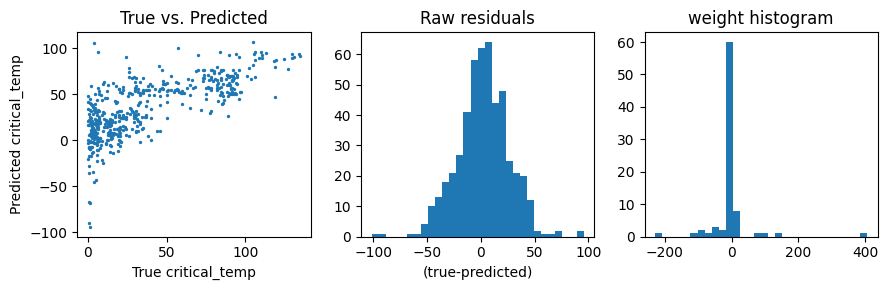

In [15]:
# Plots of the results

weights, y_pred = ols_regression(X_test, X_train, y_train)

plot_regression_results(y_test, y_pred, weights)

What do you observe? Is the linear regression model good?

The coefficient of determination with 0.52 is a sign that the linear regression is not a good model to use for modeling the dependency of the 81 variables together against the critical temperature of the materials.  
In the first diagram we can see that the predicted values are far off from the true critical temperature and while the predicted values follow roughly along with the true values the higher the critical temperature is, there is still a big deviation. Especially around the true crit. temp. of 0 there are many extreme deviations in the predicted crit. temperature.  
The weight histogram shows that the most weights are aroung 0 which could be a good sign if there weren't the values near 400 and -200. This shows that our linear regression is not optimal.

## Task 3: Compare your implementation to sklearn

Now, familiarize yourself with the sklearn library. In the section on linear models:

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

you will find `sklearn.linear_model.LinearRegression`, the `sklearn` implementation of the OLS estimator. Use this sklearn class to implement OLS linear regression. Again obtain estimates of the weights on `X_train` and `y_train` and compute the MSE and $r^2$ on `X_test`.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


def sklearn_regression(X_test, X_train, y_train):
    '''Computes OLS weights for linear regression without regularization using the sklearn library on the training set and
       returns weights and testset predictions.

       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set

       Outputs:
         weights: The weight vector for the regerssion model including the offset
         y_pred: The predictions on the TEST set

       Note:
         The sklearn library automatically takes care of adding a column for the offset.
    '''

    # ---------------- INSERT CODE ----------------------
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    print(y_pred)
    weights = lr.coef_
    print(weights)
    # ---------------- END CODE -------------------------

    return weights, y_pred

[[ 2.68251114e+01]
 [ 9.40940452e+00]
 [ 5.83103423e+01]
 [ 6.95117745e+01]
 [ 5.91041348e+01]
 [ 2.33817998e+01]
 [ 5.62351175e+01]
 [ 7.52290427e+01]
 [ 5.42601602e+01]
 [ 1.16891294e+01]
 [ 2.81272325e+01]
 [ 2.48516352e+01]
 [ 1.68085572e+01]
 [ 8.81917487e+01]
 [ 9.34808013e+01]
 [ 9.71499294e+00]
 [ 3.38714806e+01]
 [ 1.83300819e+01]
 [ 6.56202815e+01]
 [-3.30270758e+00]
 [ 1.47488375e+01]
 [ 1.00066103e+02]
 [ 6.36876659e+00]
 [ 2.91722205e+01]
 [ 3.13876699e+01]
 [ 6.32497996e+01]
 [ 4.13575123e+01]
 [ 2.01823210e+01]
 [ 3.79105749e+01]
 [ 5.06089701e+01]
 [-9.89256523e+00]
 [ 5.02608432e+01]
 [ 1.24178303e+01]
 [ 1.13279711e+01]
 [-1.77309611e+00]
 [ 3.34323433e+00]
 [ 9.27741505e+00]
 [ 3.77095722e+01]
 [ 2.09724312e+01]
 [ 5.16707619e+01]
 [ 5.77714274e+01]
 [ 1.83439652e+01]
 [ 2.11722167e+01]
 [ 9.58043340e+01]
 [ 1.69585163e+01]
 [-9.13303660e+00]
 [ 7.19938192e+00]
 [ 1.07063618e+02]
 [ 4.32890593e+01]
 [ 5.11137777e+00]
 [ 7.58808804e+01]
 [ 6.52519987e+01]
 [ 3.4197317

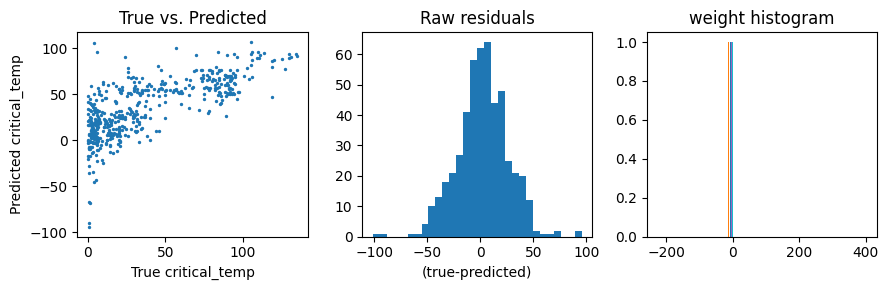

In [ ]:
weights, y_pred = sklearn_regression(X_test, X_train, y_train)
#print MSE
mse = mean_squared_error(y_test, y_pred)
print('MSE :' + str(mse))
plot_regression_results(y_test, y_pred, weights)

If you implemented everything correctly, the MSE is again 707.8.

Fit the model using the larger training set, `X_train_full` and `y_train_full`, and again evaluate on `X_test`.

In [ ]:
weights, y_pred = sklearn_regression(X_test, X_train_full, y_train_full)
plot_regression_results(y_test, y_pred, weights)

 How does test set performance change? What else changes?

YOU ANSWER HERE

## Task 4: Regularization with ridge regression

We will now explore how a penalty term on the weights can improve the prediction quality for finite data sets. Implement the analytical solution of ridge regression 

$w = (X^TX + \alpha I_D)^{-1}X^Ty$


as a function that can take different values of $\alpha$, the regularization strength, as an input. In the lecture, this parameter was called $\lambda$, but this is a reserved keyword in Python.

In [18]:
def ridge_regression(X_test, X_train, y_train, alpha):
    '''Computes OLS weights for regularized linear regression with regularization strength alpha
       on the training set and returns weights and testset predictions.

       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set
         alpha: scalar, regularization strength

       Outputs:
         weights: The weight vector for the regression model including the offset
         y_pred: The predictions on the TEST set

       Note:
         Both the training and the test set need to be appended manually by a columns of 1s to add
         an offset term to the linear regression model.
    '''

    # ---------------- INSERT CODE ----------------------
    X_train_offset = np.concatenate((X_train, np.ones((X_train.shape[0], 1))), axis=1)
    X_test_offset  = np.concatenate((X_test,  np.ones((X_test.shape[0],  1))), axis=1)

    # Use ridge regression formula
    weights = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X_train_offset), X_train_offset) + alpha * np.identity(X_train_offset.shape[1])), np.transpose(X_train_offset)), y_train)

    y_pred = np.matmul(X_test_offset, weights)


    # ---------------- END CODE -------------------------

    return weights, y_pred

Run the ridge regression on `X_train` with an alpha value of 10 and plot the obtained weights.

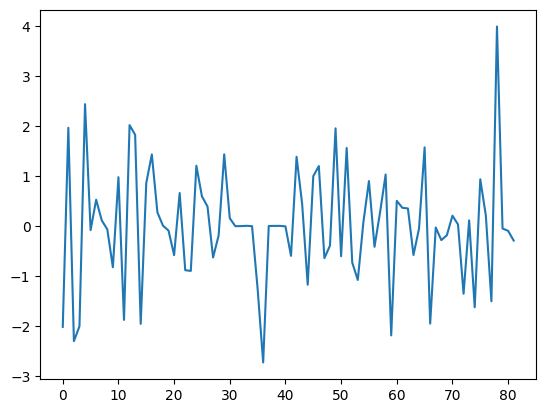

In [19]:
# Run ridge regression with alpha=10

weights, y_pred = ridge_regression(X_test, X_train, y_train, 10)

# Plot regression results

plt.plot(weights)

Now test a range of log-spaced $\alpha\text{s}$ (~10-20), which cover several orders of magnitude, e.g. from 10^-7 to 10^7. 

* For each $\alpha$, you will get one model with one set of weights. 
* For each model, compute the error on the test set. 

Store both the errors and weights of all models for later use. You can use the function `mean_squared_error` from sklearn (imported above) to compute the MSE.


In [20]:
alphas = np.logspace(-7, 7, 20)

# ---------------- INSERT CODE ----------------------

ridge_regression_df = pd.DataFrame(columns=["alpha", "coefficient_number", "coefficient_value", "mse"])

for alpha in alphas:
    weight, y_pred = ridge_regression(X_test, X_train, y_train, alpha)
    mse = mean_squared_error(y_test, y_pred)

    ridge_regression_df.loc[len(ridge_regression_df)] = {"alpha": alpha, "mse": mse}

    for i in range(len(weight)):
        ridge_regression_df.loc[len(ridge_regression_df)] = {"alpha": alpha, "coefficient_number": i, "coefficient_value": weight[i][0]}

# ---------------- END CODE -------------------------

Make a single plot that shows for each coefficient how it changes with $\alpha$, i.e. one line per coefficient. Also think about which scale is appropriate for your $\alpha$-axis. You can set this using `plt.xscale(...)`.

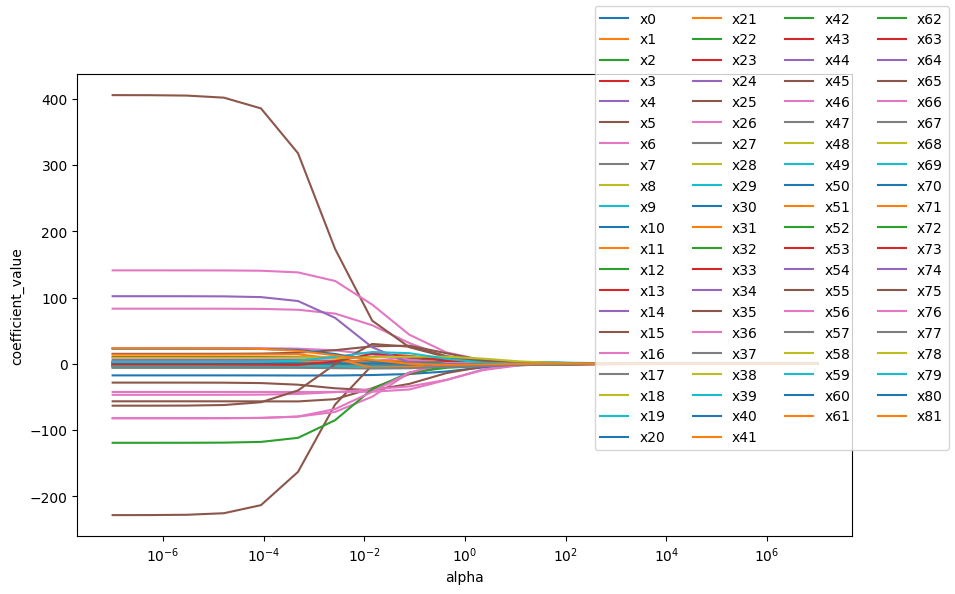

In [28]:
# Plot of coefficients vs. alphas

fig, ax = plt.subplots(figsize=(10,6))
dfs_grouped_by_coefno = ridge_regression_df.iloc[:, :3].dropna().groupby("coefficient_number")

for df in dfs_grouped_by_coefno:
    plt.plot(df[1]["alpha"], df[1]["coefficient_value"])

plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("coefficient_value")
fig.legend([f"x{int(coeff_number[0])}" for coeff_number in dfs_grouped_by_coefno], ncols=4)

Why are the values of the weights largest on the left? Do they all change monotonically? 

The values of the weights are the largest on the left because the value of the regularization strength is the lowest and the deviation from the linear regression model is the lowest at low values of the regularization strength.
The weights alltogether don't change monotonically. While they all converge to 0 with higher alphas some are increasing and some are decreasing with alpha. Even when looking at single weights we can see that at least one of them first increases then becomes greater than 0 and decreases again.

Plot how the performance (i.e. the error) changes as a function of $\alpha$. As a sanity check, the MSE value for very small $\alpha$ should be close to the test-set MSE of the unregularized solution, i.e. 708.

<Axes: xlabel='alpha'>

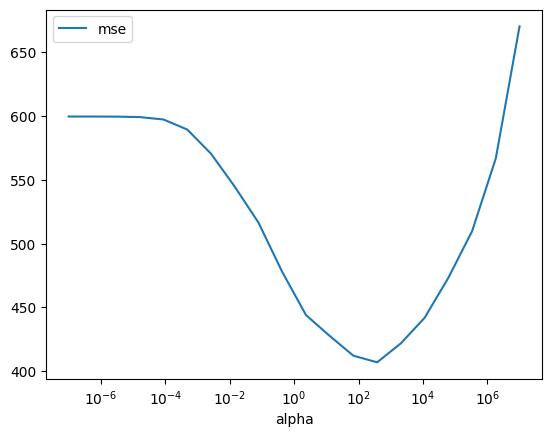

In [54]:
# Plot of MSE  vs. alphas

ridge_regression_df.iloc[:, [0,3]].dropna().plot(x="alpha", y="mse", logx=True)

Which value of $\alpha$ gives the minimum MSE? Is it better than the unregularized model? Why should the curve reach ~700 on the left?

The value for $\alpha = 100$ (not the exact value because of the selection of the alpha range) gives the minimum MSE.  
When diciding with the MSE, yes the MSE with this model is lower than with the linear regression therefore the ridge regression is in this case better than the unregularized model.  
The curve should reach about 700 on the left because if we use $\alpha = 0$ it's the same as using the unregularized model and the $\alpha$ there was (according to the description in this exercise) 707.8.

Now implement the same model using sklearn. Use the `linear_model.Ridge` object to do so.


In [55]:
def ridge_regression_sklearn(X_test, X_train, y_train, alpha):
    '''Computes OLS weights for regularized linear regression with regularization strength alpha using the sklearn
       library on the training set and returns weights and testset predictions.

       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set
         alpha: scalar, regularization strength

       Outputs:
         weights: The weight vector for the regerssion model including the offset
         y_pred: The predictions on the TEST set

       Note:
         The sklearn library automatically takes care of adding a column for the offset.
    '''

    # ---------------- INSERT CODE ----------------------

    model = linear_model.Ridge(alpha)

    model.fit(X_train, y_train)

    weights = model.coef_
    y_pred = model.predict(X_test)

    # ---------------- END CODE -------------------------

    return weights, y_pred

This time, only plot how the performance changes as a function of $\alpha$. 

<Axes: xlabel='alpha'>

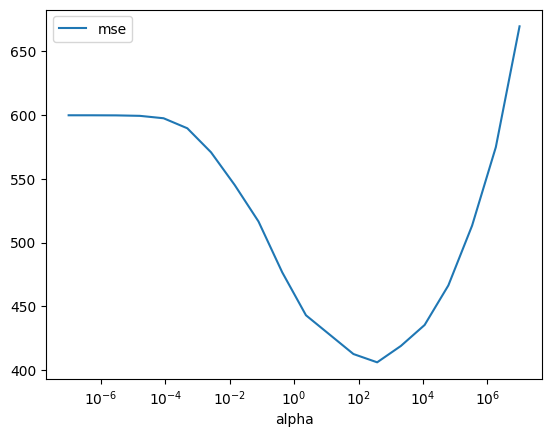

In [63]:
# Plot of MSE  vs. alphas

ridge_regression_sklearn_df = pd.DataFrame(columns=["alpha", "mse"])

for alpha in alphas:
    weight, y_pred = ridge_regression_sklearn(X_test, X_train, y_train, alpha)
    mse = mean_squared_error(y_test, y_pred)

    ridge_regression_sklearn_df.loc[len(ridge_regression_sklearn_df)] = {"alpha": alpha, "mse": mse}

ridge_regression_sklearn_df.plot(x="alpha", y="mse", logx=True)

Note: Don't worry if the curve is not exactly identical to the one you got above. The loss function we wrote down in the lecture  has $\alpha$ defined a bit differently compared to sklearn. However, qualitatively it should look the same.

## Task 5: Cross-validation

Until now, we always estimated the error on the test set directly. However, we typically do not want to tune hyperparameters of our inference algorithms like $\alpha$ on the test set, as this may lead to overfitting. Therefore, we tune them on the training set using cross-validation. As discussed in the lecture, the training data is here split in `n_folds`-ways, where each of the folds serves as a held-out dataset in turn and the model is always trained on the remaining data. Implement a function that performs cross-validation for the ridge regression parameter $\alpha$. You can reuse functions written above.

In [16]:
def ridgeCV(X, y, n_folds, alphas):
    '''Runs a n_fold-crossvalidation over the ridge regression parameter alpha.
       The function should train the linear regression model for each fold on all values of alpha.

      Inputs:
        X: (n_obs, n_features) numpy array - predictor
        y: (n_obs,) numpy array - target
        n_folds: integer - number of CV folds
        alphas: (n_parameters,) - regularization strength parameters to CV over

      Outputs:
        cv_results_mse: (n_folds, len(alphas)) numpy array, MSE for each cross-validation fold

      Note:
        Fix the seed for reproducibility.
    '''

    cv_results_mse = np.zeros((n_folds, len(alphas)))
    np.random.seed(seed=2)
    # Shuffle indices
    indices = np.arange(len(X))
    #print('indices:')
    #print(indices)
    np.random.shuffle(indices)
    #print('indices nach shuffle')
    #print(indices)
    # ---------------- INSERT CODE ----------------------
    for alpha_ind, alpha in enumerate(alphas):
        for fold in range(n_folds):
            # Split data into train and test sets
            test_indices = indices[int((fold) * len(indices) / n_folds) : int((fold + 1) * len(indices) / n_folds)]
            train_indices = np.setdiff1d(indices, test_indices)

            X_train, X_test = X[train_indices], X[test_indices]
            y_train, y_test = y[train_indices], y[test_indices]

            # Fit Ridge regression model
            model = linear_model.Ridge(alpha=alpha, random_state=None)
            model.fit(X_train, y_train)

            # Predict and compute MSE
            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            cv_results_mse[fold, alpha_ind] = mse

    # ---------------- END CODE -------------------------

    return cv_results_mse

Now we run 10-fold cross-validation using the training data of a range of $\alpha$s.

In [ ]:
alphas = np.logspace(-7, 7, 100)
mse_cv = ridgeCV(X_train, y_train, n_folds=10, alphas=alphas)

indices:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199]
indices nach shuffle
[112  29 182 199 193  85  10  54 115  35  12  92  13 126 174   2  44   3
 113  14  23  25   6 134 165 173  45  65  48 122 178  64   9  57  78  71
 128 176 13

We plot the MSE trace for each fold separately:

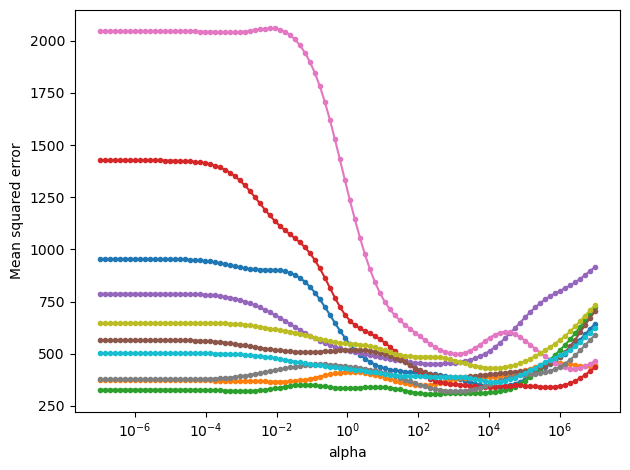

In [ ]:
plt.plot(alphas, mse_cv.T, '.-')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.tight_layout()

We also plot the average across folds:

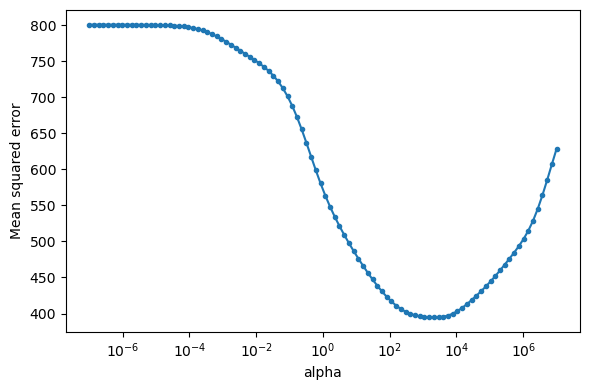

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(alphas, np.mean(mse_cv, axis=0), '.-')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.tight_layout()

What is the optimal $\alpha$? Is it similar to the one found on the test set? Do the cross-validation MSE and the test-set MSE match well or differ strongly?

YOUR ANSWER HERE

We will now run cross-validation on the full training data. This will take a moment, depending on the speed of your computer. Afterwards, we will again plot the mean CV curves for the full data set (blue) and the small data set (orange).

In [ ]:
alphas = np.logspace(-7, 7, 100)
mse_cv_full = ridgeCV(X_train_full, y_train_full, n_folds=10, alphas=alphas)

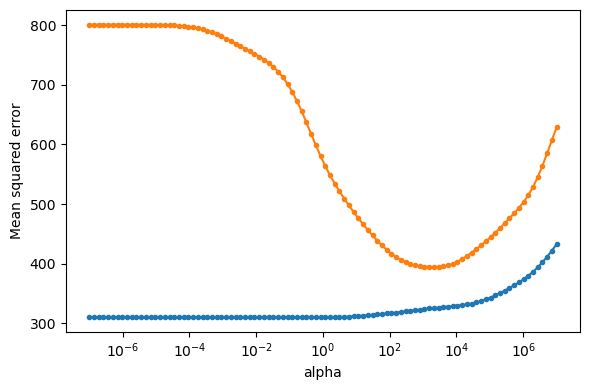

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(alphas, np.mean(mse_cv_full, axis=0), '.-')
plt.plot(alphas, np.mean(mse_cv, axis=0), '.-')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.tight_layout()

We zoom in on the blue curve to the very left:

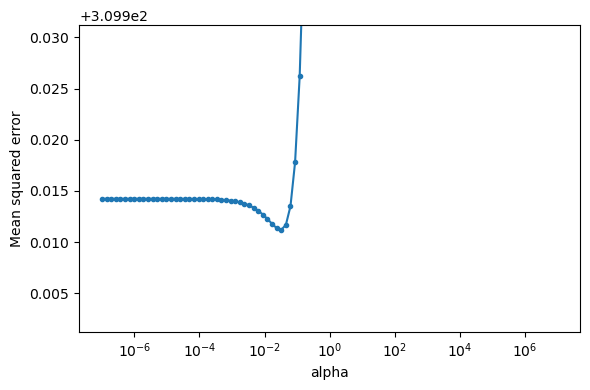

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(alphas, np.mean(mse_cv_full, axis=0), '.-')
plt.xscale('log')
minValue = np.min(np.mean(mse_cv_full, axis=0))
plt.ylim([minValue-.01, minValue+.02])
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.tight_layout()

Why does the CV curve on the full data set look so different? What is the optimal value of $\alpha$ and why is it so much smaller than on the small training set?

YOUR ANSWER HERE